#Preprocessing Phase

Import libraries

In [1]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.6 MB/s 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import data_table
import ipywidgets as widgets
import plotly.graph_objects as go
import imblearn
from collections import Counter
from matplotlib import pyplot
from numpy import where
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import ADASYN, SMOTE
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from pandas.api.types import is_numeric_dtype

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import dataset

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
df.columns

Index(['Checking_account', 'Duration_in_month', 'Credit_history', 'Purpose',
       'Credit_amount', 'Savings_account', 'Present_employment_since',
       'Installment_rate_in percentage_of_disposable_income', 'Status_Sex',
       'Other_debtors_guarantors', 'Present_residence_since', 'Property',
       'Age', 'Other_installment_plans', 'Housing', 'Number_credit', 'Job',
       'Number_people_maintenance', 'Telephone', 'foreign_worker', 'Risk'],
      dtype='object')

In [5]:
risk={"Good Risk":1,"Bad Risk":0}
df["Risk"]=df["Risk"].map(risk)
df

,Checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in percentage_of_disposable_income,Status_Sex,Other_debtors_guarantors,...,Property,Age,Other_installment_plans,Housing,Number_credit,Job,Number_people_maintenance,Telephone,foreign_worker,Risk
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,1
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,<100 DM,4<= <7 years,3,female:divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,1
996,<0 DM,30,existing credits paid back duly till now,car (used),3857,<100 DM,1<= < 4 years,4,male:divorced/separated,none,...,savings agreement/life insurance,40,none,own,1,management/ highly qualified employee,1,yes,yes,1
997,no checking account,12,existing credits paid back duly till now,radio/television,804,<100 DM,>=7 years,4,male:single,none,...,car or other,38,none,own,1,skilled employee / official,1,none,yes,1
998,<0 DM,45,existing credits paid back duly till now,radio/television,1845,<100 DM,1<= < 4 years,4,male:single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,yes,yes,0


In [6]:
counter = Counter(df["Risk"])
counter

Counter({0: 300, 1: 700})

As we can see in the Risk column there's big gap between the number of positive risk and the negative risk as a result our dataset is not balanced.We have to find the best method later to solve this problem.

##Dummy Encoding

When there is not a clear ordinal relationship between the categories we can apply a dummy encoding strategy. Given one categorical variables with k categories, a dummy encoder creates k−1 binary values which assume the value 1 if the object belong to that category, 0 otherwise. We will now perform dummy encoding on the categorical variables.

In [7]:
df_numerical = df.copy()

dummy_columns = ["Credit_history", "Purpose", "Status_Sex", "Other_debtors_guarantors", "Property", "Other_installment_plans", "Housing", \
            "foreign_worker", "Checking_account","Present_employment_since", "Savings_account", "Telephone", "Job", "foreign_worker"]

df_numerical = pd.get_dummies(df_numerical, columns=dummy_columns, drop_first=True)

In [8]:
df_numerical.head()


,Duration_in_month,Credit_amount,Installment_rate_in percentage_of_disposable_income,Present_residence_since,Age,Number_credit,Number_people_maintenance,Risk,Credit_history_critical account,Credit_history_delay in paying off,...,Present_employment_since_unemployed,Savings_account_500 <= < 1000 DM,Savings_account_<100 DM,Savings_account_>= 1000 DM,Savings_account_no savings account,Telephone_yes,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,1,0,...,0,0,0,0,1,1,1,0,0,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,0,0,0,0,1,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [9]:
df_numerical.columns

Index(['Duration_in_month', 'Credit_amount',
       'Installment_rate_in percentage_of_disposable_income',
       'Present_residence_since', 'Age', 'Number_credit',
       'Number_people_maintenance', 'Risk', 'Credit_history_critical account',
       'Credit_history_delay in paying off',
       'Credit_history_existing credits paid back duly till now',
       'Credit_history_no credits taken', 'Purpose_car (new)',
       'Purpose_car (used)', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_others',
       'Purpose_radio/television', 'Purpose_repairs', 'Purpose_retraining',
       'Status_Sex_male:divorced/separated', 'Status_Sex_male:married/widowed',
       'Status_Sex_male:single', 'Other_debtors_guarantors_guarantor',
       'Other_debtors_guarantors_none', 'Property_real estate',
       'Property_savings agreement/life insurance',
       'Property_unknown / no property', 'Other_installment_plans_none',
       'Other_installment_pla

##Train-test split

We will now divide our dataset into a training part and a test part.

In [10]:
X = np.array(df_numerical.loc[:, df_numerical.columns != "Risk"])
print(f"Shape of the features of the dataset: {X.shape}")

y = np.array(df_numerical.loc[:, "Risk"])
print(f"Shape of the labels of the dataset: {y.shape}")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, stratify=y)

print(f"Shape of the training set: {X_train.shape}")
print(f"Shape of the test set: {X_test.shape}")

Shape of the features of the dataset: (1000, 49)
Shape of the labels of the dataset: (1000,)
Shape of the training set: (800, 49)
Shape of the test set: (200, 49)


 The training set contains the 80% of the original observations, while the test set the 20%. The split is done in a stratified way, this means that the we keep the label distribution between the sets.

##Data Standardization

As a preprocessing step is important to normalize the data. This is useful to bring all the features on the same scale.

In [60]:
scaler = StandardScaler()
X_train_raw = X_train
X_test_raw = X_test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Oversampling VS Undersampling 

As we mentioned before, the dataset is imbalanced : In this situation to try some tecniques to re-balance the dataset and see if this improves the performance of the models later which are : Oversampling aand undersampling methods.

###I-ADASYN

In [15]:
ada = ADASYN()

X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print(f"Shape of the balanced ADASYN dataset is: {X_train_ada.shape}")

pos_ratio = y_train_ada[y_train_ada==1].shape[0]/y_train_ada.shape[0]
neg_ratio = y_train_ada[y_train_ada==0].shape[0]/y_train_ada.shape[0]

print(f"Proportion of positive samples in the balanced training set: {pos_ratio:.2f}")
print(f"Proportion of negative samples in the balanced training set: {neg_ratio:.2f}")

pos_ratio_test = y_test[y_test==1].shape[0]/y_test.shape[0]
neg_ratio_test = y_test[y_test==0].shape[0]/y_test.shape[0]

print(f"Proportion of positive samples in the test set: {pos_ratio_test}")
print(f"Proportion of negative samples in the test set: {neg_ratio_test}")

Shape of the balanced ADASYN dataset is: (1086, 49)
Proportion of positive samples in the balanced training set: 0.52
Proportion of negative samples in the balanced training set: 0.48
Proportion of positive samples in the test set: 0.7
Proportion of negative samples in the test set: 0.3


###II-SMOTEENN : SMOTE + END

SMOTE : The Synthetic Minority Over-sampling Technique (SMOTE) is an algorithm very similar to ADASYN.



In [16]:
smoteenn = SMOTE()

X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
print(f"Shape of the balanced SMOTE dataset is: {X_train_smoteenn.shape}")

pos_ratio = y_train_smoteenn[y_train_smoteenn==1].shape[0]/y_train_smoteenn.shape[0]
neg_ratio = y_train_smoteenn[y_train_smoteenn==0].shape[0]/y_train_smoteenn.shape[0]

print(f"Proportion of positive samples in the balanced training set: {pos_ratio:.2f}")
print(f"Proportion of negative samples in the balanced training set: {neg_ratio:.2f}")

pos_ratio_test = y_test[y_test==1].shape[0]/y_test.shape[0]
neg_ratio_test = y_test[y_test==0].shape[0]/y_test.shape[0]

print(f"Proportion of positive samples in the test set: {pos_ratio_test}")
print(f"Proportion of negative samples in the test set: {neg_ratio_test}")

Shape of the balanced SMOTE dataset is: (1120, 49)
Proportion of positive samples in the balanced training set: 0.50
Proportion of negative samples in the balanced training set: 0.50
Proportion of positive samples in the test set: 0.7
Proportion of negative samples in the test set: 0.3


ENN : The Edited Nearest Neighbors (ENN) is a undersampling tecnique.


In [17]:
smoteenn = EditedNearestNeighbours()

X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
print(f"Shape of the balanced SMOTEEN dataset is: {X_train_smoteenn.shape}")

pos_ratio = y_train_smoteenn[y_train_smoteenn==1].shape[0]/y_train_smoteenn.shape[0]
neg_ratio = y_train_smoteenn[y_train_smoteenn==0].shape[0]/y_train_smoteenn.shape[0]

print(f"Proportion of positive samples in the balanced training set: {pos_ratio:.2f}")
print(f"Proportion of negative samples in the balanced training set: {neg_ratio:.2f}")

pos_ratio_test = y_test[y_test==1].shape[0]/y_test.shape[0]
neg_ratio_test = y_test[y_test==0].shape[0]/y_test.shape[0]

print(f"Proportion of positive samples in the test set: {pos_ratio_test}")
print(f"Proportion of negative samples in the test set: {neg_ratio_test}")

Shape of the balanced SMOTEEN dataset is: (530, 49)
Proportion of positive samples in the balanced training set: 0.55
Proportion of negative samples in the balanced training set: 0.45
Proportion of positive samples in the test set: 0.7
Proportion of negative samples in the test set: 0.3



We will now apply the SMOTEENN algorithm to the dataset, in particular, SMOTE will be applied only to the minority class, while ENN will be applied after SMOTE on both the classes. Thus we will undersample the majority class and the minority class (we try to correct the noise introduced by SMOTE and undersample the majority).

In [18]:
smoteenn = SMOTEENN(smote=SMOTE(), enn=EditedNearestNeighbours())

X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
print(f"Shape of the balanced SMOTEEN dataset is: {X_train_smoteenn.shape}")

pos_ratio = y_train_smoteenn[y_train_smoteenn==1].shape[0]/y_train_smoteenn.shape[0]
neg_ratio = y_train_smoteenn[y_train_smoteenn==0].shape[0]/y_train_smoteenn.shape[0]

print(f"Proportion of positive samples in the balanced training set: {pos_ratio:.2f}")
print(f"Proportion of negative samples in the balanced training set: {neg_ratio:.2f}")

pos_ratio_test = y_test[y_test==1].shape[0]/y_test.shape[0]
neg_ratio_test = y_test[y_test==0].shape[0]/y_test.shape[0]

print(f"Proportion of positive samples in the test set: {pos_ratio_test}")
print(f"Proportion of negative samples in the test set: {neg_ratio_test}")

Shape of the balanced SMOTEEN dataset is: (798, 49)
Proportion of positive samples in the balanced training set: 0.30
Proportion of negative samples in the balanced training set: 0.70
Proportion of positive samples in the test set: 0.7
Proportion of negative samples in the test set: 0.3


##Dimensionality reduction

###Principal Component Analysis

Dimensionality reduction consists mapping data in a lower dimensionality space. The goal is to keep the loss of information as little as possible. 



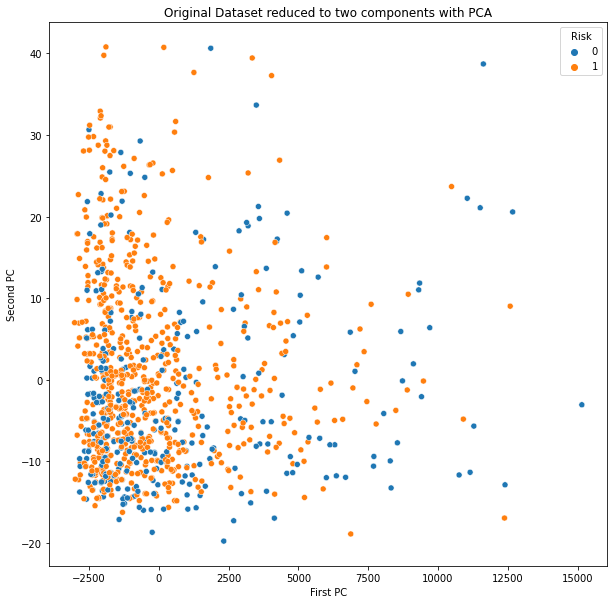

The percentage of variance explained by each components is: [9.99971667e-01 1.64239733e-05]


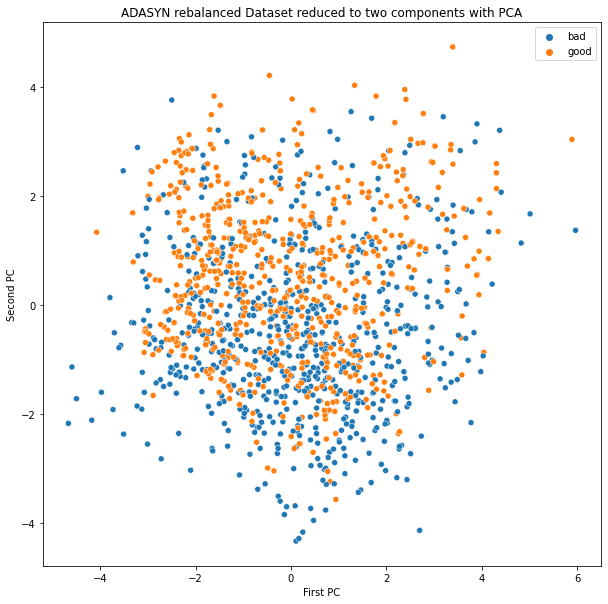

The percentage of variance explained by each components for the ADASYN dataset is: [0.0680225  0.05430986]


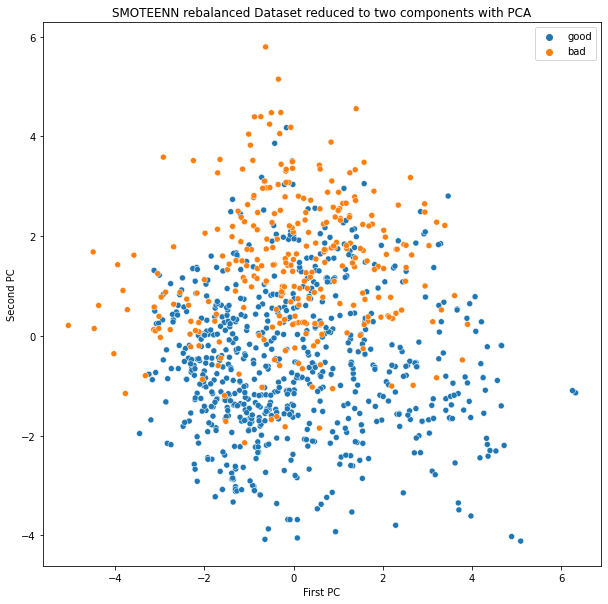

The percentage of variance explained by each components for the SMOTEENN dataset is: [0.07430464 0.06480704]


In [19]:
pca = PCA(n_components=2)

X_pca_visualization = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization[:, 0], y=X_pca_visualization[:, 1], hue=df["Risk"])
ax.set_title("Original Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()

print(f"The percentage of variance explained by each components is: {pca.explained_variance_ratio_}")

pca = PCA(n_components=2)
X_ada, y_ada =  ada.fit_resample(scaler.fit_transform(X), y)
X_pca_visualization_ada = pca.fit_transform(X_ada)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization_ada[:, 0], y=X_pca_visualization_ada[:, 1], \
                hue=pd.Series(y_ada).replace({0:"good", 1:"bad"}))
ax.set_title("ADASYN rebalanced Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()

print(f"The percentage of variance explained by each components for the ADASYN dataset is: {pca.explained_variance_ratio_}")

pca = PCA(n_components=2)
X_smoteenn, y_smoteenn =  smoteenn.fit_resample(scaler.fit_transform(X), y)
X_pca_visualization_smoteenn = pca.fit_transform(X_smoteenn)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization_smoteenn[:, 0], y=X_pca_visualization_smoteenn[:, 1], \
                hue=pd.Series(y_smoteenn).replace({0:"good", 1:"bad"}))
ax.set_title("SMOTEENN rebalanced Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()

print(f"The percentage of variance explained by each components for the SMOTEENN dataset is: {pca.explained_variance_ratio_}")

We choose the number of components by looking at the proportion of variance explained by each one of these. We can do that by plotting the cumulative proportion of variance explained and the proportion of variance explained in a graph as the number of components increase. 

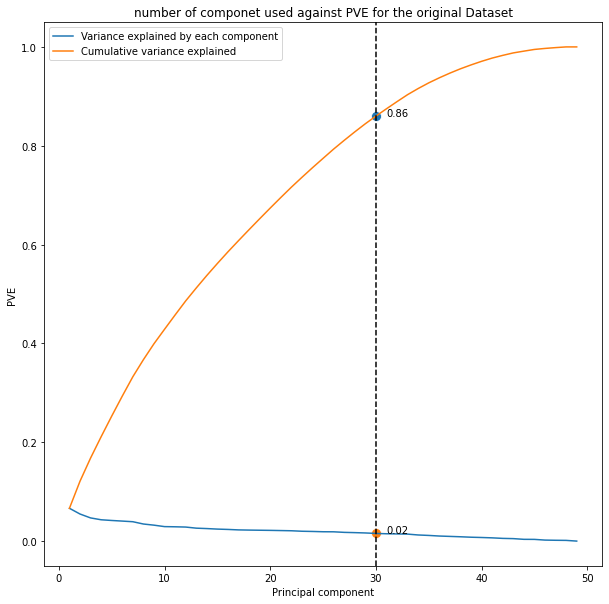

In [20]:
pca = PCA(n_components=X_train.shape[1])
c_analyzed = 30

pca.fit(X_train)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x=range(1, X_train.shape[1]+1), y=pca.explained_variance_ratio_, label="Variance explained by each component")
ax = sns.lineplot(x=range(1, X_train.shape[1]+1), y=np.cumsum(pca.explained_variance_ratio_), label="Cumulative variance explained")
ax = sns.scatterplot(x=[c_analyzed], y=[np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1], f"{np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]:.2f}",\
       horizontalalignment='left')

ax = sns.scatterplot(x=[c_analyzed], y=[pca.explained_variance_ratio_[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, pca.explained_variance_ratio_[c_analyzed-1], f"{pca.explained_variance_ratio_[c_analyzed-1]:.2f}",\
       horizontalalignment='left')
plt.axvline(c_analyzed, color="black", ls="--")
ax.set_title("number of componet used against PVE for the original Dataset")
ax.set_xlabel("Principal component")
ax.set_ylabel("PVE")
plt.show()

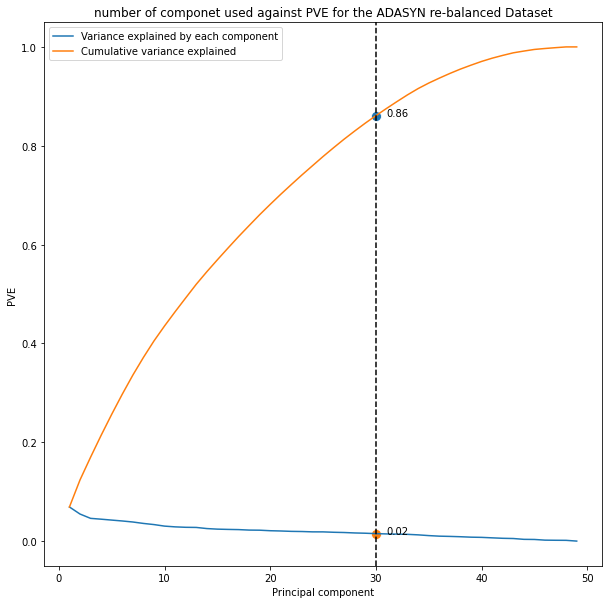

In [21]:
pca = PCA(n_components=X_train_ada.shape[1])

pca.fit(X_train_ada)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x=range(1, X_train_ada.shape[1]+1), y=pca.explained_variance_ratio_, label="Variance explained by each component")
ax = sns.lineplot(x=range(1, X_train_ada.shape[1]+1), y=np.cumsum(pca.explained_variance_ratio_), label="Cumulative variance explained")
ax = sns.scatterplot(x=[c_analyzed], y=[np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1], f"{np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]:.2f}",\
       horizontalalignment='left')

ax = sns.scatterplot(x=[c_analyzed], y=[pca.explained_variance_ratio_[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, pca.explained_variance_ratio_[c_analyzed-1], f"{pca.explained_variance_ratio_[c_analyzed-1]:.2f}",\
       horizontalalignment='left')
plt.axvline(c_analyzed, color="black", ls="--")
ax.set_title("number of componet used against PVE for the ADASYN re-balanced Dataset")
ax.set_xlabel("Principal component")
ax.set_ylabel("PVE")
plt.show()

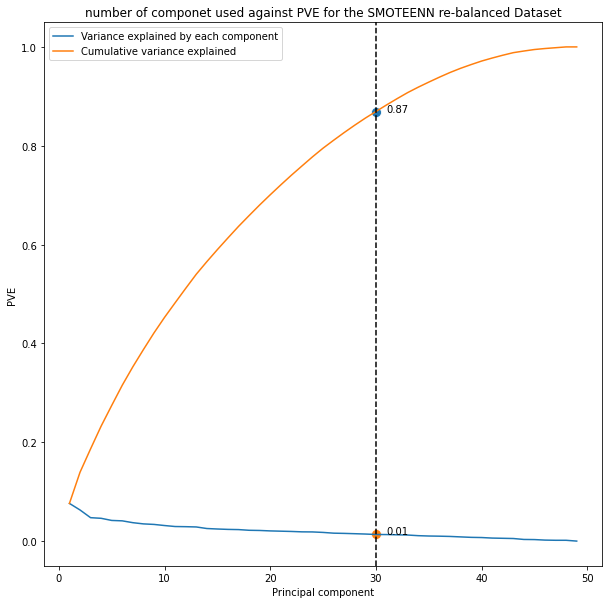

In [22]:
pca = PCA(n_components=X_train_smoteenn.shape[1])

pca.fit(X_train_smoteenn)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x=range(1, X_train_smoteenn.shape[1]+1), y=pca.explained_variance_ratio_, label="Variance explained by each component")
ax = sns.lineplot(x=range(1, X_train_smoteenn.shape[1]+1), y=np.cumsum(pca.explained_variance_ratio_), label="Cumulative variance explained")
ax = sns.scatterplot(x=[c_analyzed], y=[np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1], f"{np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]:.2f}",\
       horizontalalignment='left')

ax = sns.scatterplot(x=[c_analyzed], y=[pca.explained_variance_ratio_[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, pca.explained_variance_ratio_[c_analyzed-1], f"{pca.explained_variance_ratio_[c_analyzed-1]:.2f}",\
       horizontalalignment='left')
plt.axvline(c_analyzed, color="black", ls="--")
ax.set_title("number of componet used against PVE for the SMOTEENN re-balanced Dataset")
ax.set_xlabel("Principal component")
ax.set_ylabel("PVE")
plt.show()

We choose to use 30 components which preserve a PVE of around 85% :

In [23]:
pca = PCA(c_analyzed)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
X_train_ada.shape

(1086, 49)

In [25]:
X_train_pca.shape

(800, 30)

# Modeling Phase

## Random Forest 

In [ ]:
random_forest = RandomForestClassifier( random_state = 100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

To find Optimal Parameters we used RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_forest = RandomForestClassifier(random_state = 100)
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=4, scoring='recall', random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
Y_test_pred = rf_random.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


## Evaluation metrics

### Confusion Matrix


In [ ]:
CM = confusion_matrix(y_test, Y_test_pred)
CM

array([[ 20,  40],
       [  5, 135]])

In [ ]:
total=sum(sum(CM))
sensitivity_recall = CM[0,0]/(CM[0,0]+CM[1,0])
print('Sensitivity_recall : ',sensitivity_recall )
Specificity = CM[1,1]/(CM[1,1]+CM[0,1])
print('Specificity: ', Specificity)
precision = CM[0,0]/(CM[0,0]+CM[0,1])
print('Precision: ', precision)
accuracy =(CM[0,0]+CM[1,1])/(CM[0,0]+CM[0,1]+CM[1,0]+CM[1,1])
print("Accuracy: ", accuracy_score(y_test, Y_test_pred))

Sensitivity_recall :  0.8
Specificity:  0.7714285714285715
Precision:  0.3333333333333333
Accuracy:  0.775


## Catboost Classifier 


In [12]:
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

train_dataset = Pool(X_train, y_train)



In [13]:
clf.fit(train_dataset, verbose=True, plot=True)
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6531183	total: 48.4ms	remaining: 194ms
1:	learn: 0.6192948	total: 51ms	remaining: 76.4ms
2:	learn: 0.5945720	total: 54.7ms	remaining: 36.4ms
3:	learn: 0.5715633	total: 56.7ms	remaining: 14.2ms
4:	learn: 0.5529133	total: 58.5ms	remaining: 0us
CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [14]:
y_pred=clf.predict(data=X_test)

## Evaluation metrics

### Confusion Matrix


In [ ]:
CM2 = confusion_matrix(y_test, y_pred)
CM2

array([[  7,  53],
       [  2, 138]])

In [ ]:
total=sum(sum(CM2))
sensitivity_recall = CM2[0,0]/(CM2[0,0]+CM2[1,0])
print('Sensitivity_recall : ',sensitivity_recall )
Specificity = CM2[1,1]/(CM2[1,1]+CM2[0,1])
print('Specificity: ', Specificity)
precision = CM2[0,0]/(CM2[0,0]+CM2[0,1])
print('Precision: ', precision)
accuracy =(CM2[0,0]+CM2[1,1])/(CM2[0,0]+CM2[0,1]+CM2[1,0]+CM2[1,1])
print("Accuracy: ", accuracy_score(y_test, y_pred))

Sensitivity_recall :  0.7777777777777778
Specificity:  0.7225130890052356
Precision:  0.11666666666666667
Accuracy:  0.79


##XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=4, scoring='recall', random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
Y_test_pred_xgb = rf_random.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line

## Evaluation metrics

### Confusion Matrix


In [ ]:
CM3 = confusion_matrix(y_test, Y_test_pred_xgb)
CM3

array([[ 34,  26],
       [ 19, 121]])

In [ ]:
total=sum(sum(CM))
sensitivity_recall = CM3[0,0]/(CM3[0,0]+CM3[1,0])
print('Sensitivity_recall : ',sensitivity_recall )
Specificity = CM3[1,1]/(CM3[1,1]+CM3[0,1])
print('Specificity: ', Specificity)
precision = CM3[0,0]/(CM3[0,0]+CM3[0,1])
print('Precision: ', precision)
accuracy =(CM3[0,0]+CM3[1,1])/(CM3[0,0]+CM3[0,1]+CM3[1,0]+CM3[1,1])
print("Accuracy: ", accuracy_score(y_test, Y_test_pred_xgb))

Sensitivity_recall :  0.6415094339622641
Specificity:  0.8231292517006803
Precision:  0.5666666666666667
Accuracy:  0.775


### The ROC curve



Random Forest: 0.65
Catboost: 0.70
XGBoost: 0.72




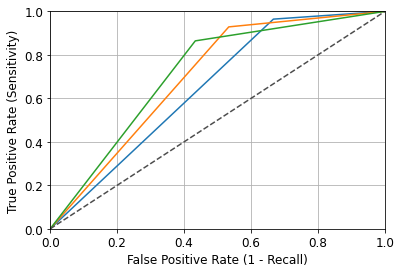

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, Y_test_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, Y_test_pred_xgb)
fig, ax = plt.subplots()
ax.plot(fpr, tpr,label="Area Under Curve: %.2f" %auc(fpr, tpr))
ax.plot(fpr1, tpr1)
ax.plot(fpr2, tpr2)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("\n")
print ("Random Forest: %.2f" %auc(fpr, tpr))
print ("Catboost: %.2f" %auc(fpr1, tpr1))
print ("XGBoost: %.2f" %auc(fpr2, tpr2))

print("\n")

In [15]:
import pickle

In [16]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [17]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.74


In [18]:
loaded_model.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [19]:
df.shape

(1000, 21)

In [20]:
df_numerical

,Duration_in_month,Credit_amount,Installment_rate_in percentage_of_disposable_income,Present_residence_since,Age,Number_credit,Number_people_maintenance,Risk,Credit_history_critical account,Credit_history_delay in paying off,...,Present_employment_since_unemployed,Savings_account_500 <= < 1000 DM,Savings_account_<100 DM,Savings_account_>= 1000 DM,Savings_account_no savings account,Telephone_yes,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,1,0,...,0,0,0,0,1,1,1,0,0,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,0,0,0,0,1,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,1
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
997,12,804,4,4,38,1,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
998,45,1845,4,4,23,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [21]:
X_test[1]

array([ 2.31350693,  3.91082336, -0.84905544, -0.76550564, -0.93093886,
       -0.70708529, -0.43236977, -0.6352234 , -0.31687956, -1.07803625,
        5.06622805, -0.5658021 , -0.32868411, -0.10050378, -0.22331316,
       -0.48825208, -0.10666772, -0.60816364, -0.14734777, -0.09395338,
       -0.23241869, -0.30966177,  0.90225216, -0.2353911 ,  0.33101366,
       -0.6139514 , -0.57350122, -0.42624394,  0.48628803, -0.22331316,
        0.62360956, -0.45657334,  0.19044535, -0.60045334, -0.26904657,
       -0.81862454, -0.46255869, -0.45857109, -0.58312392, -0.24983394,
       -0.24699789,  0.81649658, -0.22941573, -0.48628803,  1.20581414,
        0.75203572, -0.14734777, -0.50195237,  0.19044535])

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [58]:
#t = [ ('num', StandardScaler(), X_train)]
#col_transform = ColumnTransformer(transformers=t)

In [59]:
#pipeline = Pipeline(steps=[('prep',col_transform), ('m', clf)])

In [49]:
#filename3 = 'transformer.sav'
#pickle.dump(col_transform, open(filename3, 'wb'))

In [61]:
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [44]:
filename2 = 'finalized_model.sav'
pickle.dump(clf, open(filename2, 'wb'))

In [68]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, stratify=y)

In [50]:
loaded_pip = pickle.load(open(filename2, 'rb'))

In [62]:
scaler2 = pickle.load(open(filename, 'rb'))
X_test=scaler2.transform(X_test)
result2 = loaded_pip.score(X_test, y_test)
print(result2)

0.7


In [63]:
loaded_pip.predict(X_test[3])

1

In [64]:
X_test[3]

array([-1.63064833, -1.15361396, -1.84386315, -2.43651512, -3.19719582,
       -3.76425759, -4.39136107, -2.06085494, 10.06326595, -3.11615234,
       -1.25506728, -1.88183407, -1.43671735, -1.11804572, 24.03500011,
       -1.6726874 , -1.13863194, -2.02557343, -1.18030145, -1.10278062,
       -1.30373919, -1.44829983,  0.80359606, -1.29945001, -2.00567808,
       -2.03873218,  3.82697802, -1.6003445 , -7.41499933, 20.82931842,
       -0.20730616, -1.6841922 , -4.31573743,  3.23307658, -1.31225094,
       -2.47757361, -1.69572608, -1.66503255, -1.89004114, -1.33731576,
       -1.32067997,  0.46859315, -1.27318192, -1.71501991,  1.55797236,
        0.32893002, -1.17473442, -1.76173969, -4.31573743])

In [65]:
fileModel='finalized_model.sav'
fileScaler='scaler.sav'
model = pickle.load(open(fileModel, 'rb'))
scaler= pickle.load(open(fileScaler, 'rb'))


In [74]:
def pipeline_predict (X):
  X=scaler.transform(X)
  return model.predict(X)[0]



In [75]:
pipeline_predict([X_test[2]])

1

In [80]:
X_test[2]

array([  12, 1228,    4,    2,   24,    1,    1,    0,    0,    1,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    1,    0,    0,    1,    0,    1,    0,    1,
          1,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    1,    1])

In [85]:
df_numerical.drop("Risk",axis=1).columns

Index(['Duration_in_month', 'Credit_amount',
       'Installment_rate_in percentage_of_disposable_income',
       'Present_residence_since', 'Age', 'Number_credit',
       'Number_people_maintenance', 'Credit_history_critical account',
       'Credit_history_delay in paying off',
       'Credit_history_existing credits paid back duly till now',
       'Credit_history_no credits taken', 'Purpose_car (new)',
       'Purpose_car (used)', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_others',
       'Purpose_radio/television', 'Purpose_repairs', 'Purpose_retraining',
       'Status_Sex_male:divorced/separated', 'Status_Sex_male:married/widowed',
       'Status_Sex_male:single', 'Other_debtors_guarantors_guarantor',
       'Other_debtors_guarantors_none', 'Property_real estate',
       'Property_savings agreement/life insurance',
       'Property_unknown / no property', 'Other_installment_plans_none',
       'Other_installment_plans_store